In [1]:
%matplotlib inline

In [2]:
from math import *
import numpy as np
import uproot

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Using the uproot library (from pip) to read the ROOT file.

In [4]:
tree = uproot.open("../dat/test_100pvs.root")["data"]

The `keys()` method prints out the names of all the ROOT NTUPLE branches

In [5]:
tree.keys()

[b'pvr_x',
 b'pvr_y',
 b'pvr_z',
 b'svr_x',
 b'svr_y',
 b'svr_z',
 b'svr_pvr',
 b'hit_x',
 b'hit_y',
 b'hit_z',
 b'hit_prt',
 b'prt_pid',
 b'prt_px',
 b'prt_py',
 b'prt_pz',
 b'prt_e',
 b'prt_x',
 b'prt_y',
 b'prt_z',
 b'prt_hits',
 b'prt_pvr',
 b'ntrks_prompt']

There is probably a more elegant way to create the jagged arrays
corresponding to the branches of the ROOT Tuple, but brute
force should work here

In [6]:
##  these are the primary vertex (x,y,z) coordinates
pvr_x = tree["pvr_x"].array()
pvr_y = tree["pvr_y"].array()
pvr_z = tree["pvr_z"].array()

##  these are the secondary vertex (x,y,z) coordinates
svr_x = tree["svr_x"].array()
svr_y = tree["svr_y"].array()
svr_z = tree["svr_z"].array()

##  these are the individual hit (x,y,z) coordinates
hit_x = tree["hit_x"].array()
hit_y = tree["hit_y"].array()
hit_z = tree["hit_z"].array()
hit_prt = tree["hit_prt"].array()

The following are "particle" (track) quantities
* `_pid` refers to particle ID (type, using integer values according to the PDG)
* `_px`, `_py`, `_pz` are the momenta of the particle in GeV; `_e` is the energy
   the momenta can be used to determine the particle's direction
* `_hits` is the number of hits associated with a particle
* `_pvr` is the index of the primary vertex (within an event)

In [7]:
prt_pid = tree["prt_pid"].array()
prt_px = tree["prt_px"].array()
prt_py = tree["prt_py"].array()
prt_pz = tree["prt_pz"].array()
prt_e  = tree["prt_e"].array()
prt_x = tree["prt_x"].array()
prt_y = tree["prt_y"].array()
prt_z = tree["prt_z"].array()
prt_hits = tree["prt_hits"].array()
prt_pvr = tree["prt_pvr"].array()

## ntrks_prompt is the number of prompt tracks within an event
ntrks_prompt = tree["ntrks_prompt"].array()

The data structures created above are jagged arrays. They can be accessed correctly, however.

In [8]:
pvr_x[0]

array([ 0.0549413 , -0.0016529 , -0.04954818, -0.02259197, -0.00269173,
       -0.07635637,  0.03188467, -0.06791498, -0.00741243,  0.10143722])

In [9]:
pvr_x[1]

array([ 0.00026433,  0.00521086, -0.007497  , -0.0065097 ,  0.00121352,
        0.09593799, -0.06491184,  0.07361061,  0.0134152 , -0.04333598,
       -0.06838053])

This requires Python 3.6 for the format string:

In [10]:
for i in range(len(pvr_x[0])):
    print(f"  Primary Vertex location {i}: {pvr_x[0][i]:.5} {pvr_y[0][i]:.5} {pvr_z[0][i]:.5}")
print()
    
for i in range(len(svr_x[0])):
    print(f"  Secondary Vertex location {i}: {svr_x[0][i]:.5} {svr_y[0][i]:.5} {svr_z[0][i]:.5}")

  Primary Vertex location 0: 0.054941 -0.023912 149.25
  Primary Vertex location 1: -0.0016529 0.045335 96.427
  Primary Vertex location 2: -0.049548 -0.0041087 100.5
  Primary Vertex location 3: -0.022592 0.076516 37.941
  Primary Vertex location 4: -0.0026917 -0.079383 33.178
  Primary Vertex location 5: -0.076356 0.042207 53.63
  Primary Vertex location 6: 0.031885 -0.021017 229.84
  Primary Vertex location 7: -0.067915 0.064094 71.385
  Primary Vertex location 8: -0.0074124 -0.02748 88.507
  Primary Vertex location 9: 0.10144 -0.013357 225.8

  Secondary Vertex location 0: 0.058282 -0.020201 149.43
  Secondary Vertex location 1: 0.050295 -0.063997 136.44
  Secondary Vertex location 2: 0.093607 -0.042722 149.59
  Secondary Vertex location 3: 0.25789 -0.032594 41.682
  Secondary Vertex location 4: -0.10992 -0.044242 239.58
  Secondary Vertex location 5: 0.082845 -0.038074 102.05
  Secondary Vertex location 6: -0.023588 0.095234 37.505
  Secondary Vertex location 7: 0.03589 0.015848 -

There are quite a long list of hits

In [11]:
print(len(hit_x[0]))

3539


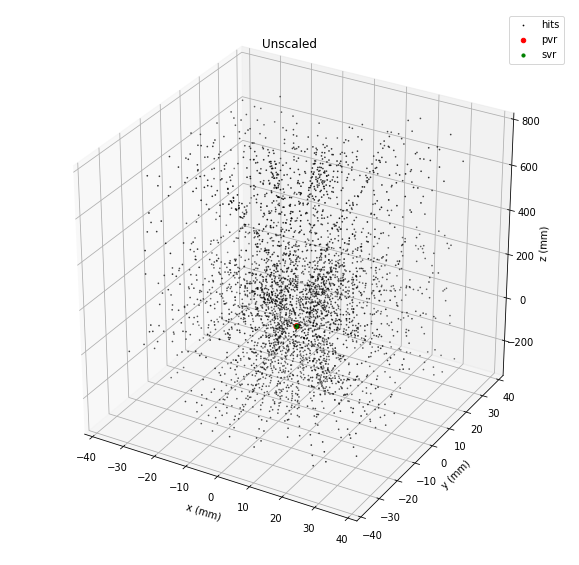

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(hit_x[0], hit_y[0], hit_z[0], c='k', s=.5, label='hits')
ax.scatter3D(pvr_x[0], pvr_y[0], pvr_y[0], c='r', s=20, label='pvr')
ax.scatter3D(svr_x[0], svr_y[0], svr_y[0], c='g', s=10, label='svr')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
ax.legend()
ax.set_title('Unscaled');

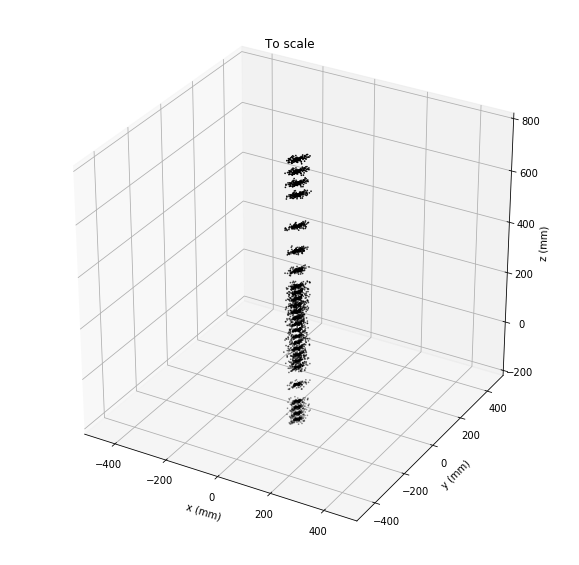

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(hit_x[0], hit_y[0], hit_z[0], c='k', s=.5, label='hits')
ax.set_xlim(-500, 500)
ax.set_ylim(-500, 500)
ax.set_zlim(-200, 800)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
ax.set_title('To scale');

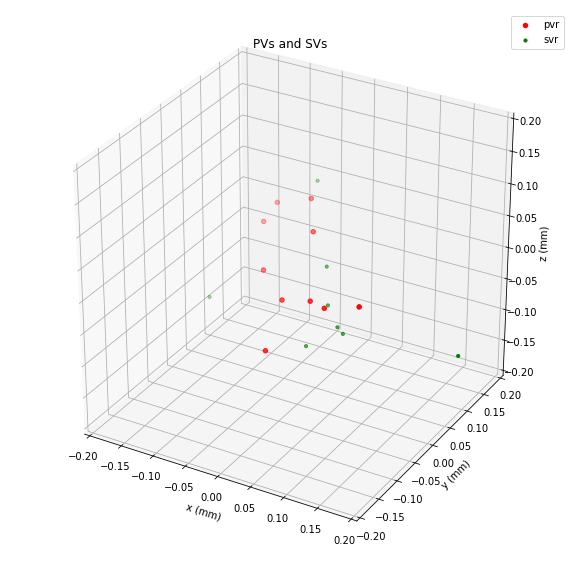

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(pvr_x[0], pvr_y[0], pvr_y[0], c='r', s=20, label='pvr')
ax.scatter3D(svr_x[0], svr_y[0], svr_y[0], c='g', s=10, label='svr')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
ax.set_xlim(-.2, .2)
ax.set_ylim(-.2, .2)
ax.set_zlim(-.2, .2)
ax.legend()
ax.set_title('PVs and SVs');

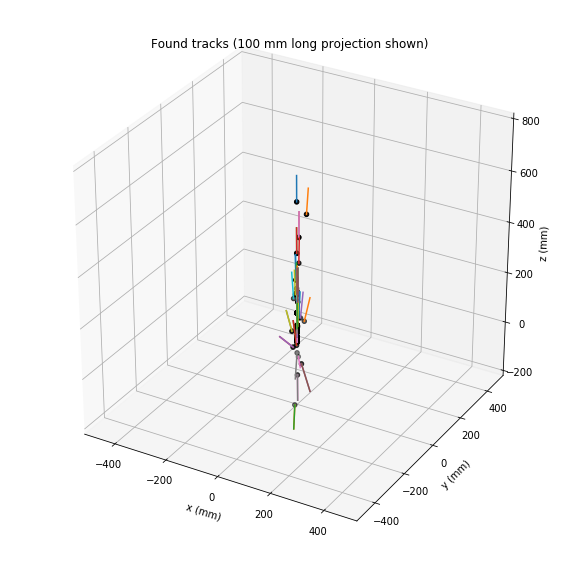

In [15]:
x = np.array(prt_x[0])
y = np.array(prt_y[0])
z = np.array(prt_z[0])

px = np.array(prt_x[0])
py = np.array(prt_y[0])
pz = np.array(prt_z[0])

dx = x + px / np.sqrt(px**2 + py**2 + pz**2) * 100
dy = y + py / np.sqrt(px**2 + py**2 + pz**2) * 100
dz = z + pz / np.sqrt(px**2 + py**2 + pz**2) * 100

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
ax.set_xlim(-500, 500)
ax.set_ylim(-500, 500)
ax.set_zlim(-200, 800)

ax.set_title('Found tracks (100 mm long projection shown)');

ax.scatter3D(x,y,z, c='k')

for i in range(len(x)):
    ax.plot3D([x[i],dx[i]], [y[i],dy[i]], [z[i],dz[i]])